# EDA of RateBeer Reviews

In [37]:
import numpy as np
import pandas as pd

In [38]:
import nltk

In [39]:
# Read from Dave's file directory
df = pd.read_csv('/home/dal7p/w266_final_project/data_prep/rate_beer_medium.csv', encoding='utf8')

In [40]:
from nltk.tokenize import word_tokenize

In [41]:
# Tokenize
df['Tokens'] = df['Text'].apply(lambda text: word_tokenize(text))
df['Tokens_Len'] = df['Tokens'].apply(lambda tokens: len(tokens))

In [42]:
import matplotlib as plt
%matplotlib inline

### Statistics

Number of reviews:

In [43]:
# Number of entries
df.shape[0]

71428

In [44]:
# Description statistics of score column
df.Score.describe()

count    71428.000000
mean         0.676320
std          0.150506
min          0.050000
25%          0.600000
50%          0.700000
75%          0.800000
max          1.000000
Name: Score, dtype: float64

Number of reviews for each score:

In [45]:
counts_df = df.groupby(['Score']).agg('count')
counts_df

,Unnamed: 0,Text,Tokens,Tokens_Len
Score,,,,
0.05,145,145,145,145
0.10,185,185,185,185
0.15,275,275,275,275
0.20,376,376,376,376
0.25,546,546,546,546
0.30,718,718,718,718
0.35,987,987,987,987
0.40,1497,1497,1497,1497
0.45,1819,1819,1819,1819


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47433d0ba8>]],
      dtype=object)

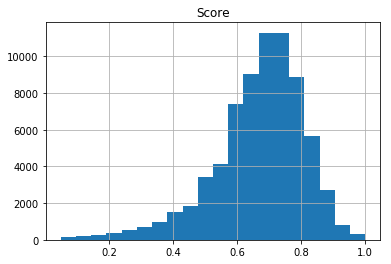

In [48]:
df.hist(column='Score', bins=20)

This chart shows that there is an imbalance in the number of reviews written for ratings that are  given a 5.

### Show Histogram of Review Lengths

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f474280ef98>]],
      dtype=object)

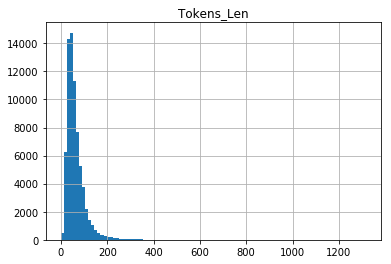

In [52]:
df.hist(column='Tokens_Len', bins=100)

This chart shows that the length of reviews follows the power law (Zipf's Law).

### Find Largest Review

In [53]:
largest_review = df['Tokens_Len'].max()
largest_review

1314

View Text of Largest Review

In [54]:
df_largest_reviews = df.loc[df['Tokens_Len']==largest_review]
df_largest_reviews = df_largest_reviews.reset_index(drop=True)
print(df_largest_reviews.loc[0,'Text'])
print(df_largest_reviews.loc[0,'Score'])


UPDATED: OCT 10, 2010 Anderson Valley Brewing Company--Winter Solstice Select Ale--6.9% ABV.		1997-8 22 oz. Bottle.  (4.5 / 5.0)  Wow!  Smooth, rich ruby color.  Big, but easy.  Hoppy and flavorful.  Balanced and not sweet, just flavorful and rich.  Spicy notes are from interaction of malt and hops, not added.  Sampled 11/14/2008.		1999 22 oz. Bottle.  (4.5 / 5.0)  Clear amber red color.  Big floral front. Sweet smooth lager like body.  Sampled 11/28/1999.		2000 12 oz. Bottle.  (4.5 / 5.0)  Big Head.  Clear rich dark black cherry red color.  Rich floral hoppy aroma with light Belgian notes and unique spiciness.  Fully fermented rich complex smooth toasted fruit body.  Ends chalky clean and dry.  Sampled 11/13/2000.		2001 12 oz. Bottle.  (4.5 / 5.0)  Clear thin blood red color.  Roasted spice floral hop front.  Mixed body of creamy flavors.  Rich roasted caramel cherry fruit body with spice accents and dry sweetness.  Nut hints mix with spice hop end.  Sampled 11/30/2001.		2001 22 oz. B

### Find Average Review

In [55]:
round(df['Tokens_Len'].mean())

62

### Find Token Count of 95% of Reviews

In [56]:
# Group by token length and create a column for the count
df2 = df.groupby('Tokens_Len').size().reset_index(name='counts')

# Normalize by the total count
total_counts = df2['counts'].sum()

# Sort by token length
df2 = df2.sort_values('Tokens_Len', ascending=True)

In [57]:
from __future__ import division
df2['percentage'] = df2['counts'].apply(lambda count: count/total_counts)

In [58]:
total_percentage = 0.0
review_limit = 0

for index, row in df2.iterrows():
    total_percentage = total_percentage + row['percentage']
    if total_percentage >= 0.95:
        print('The token length for 95% is: {}'.format(row['Tokens_Len']))
        review_limit = row['Tokens_Len']
        break

The token length for 95% is: 135.0


### Remove Reviews Longer than 95% of Reviews

In [59]:
df = df[df['Tokens_Len']<= review_limit]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4742699898>]],
      dtype=object)

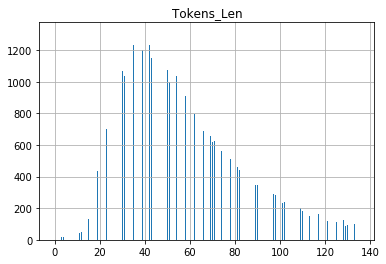

In [60]:
df.hist(column='Tokens_Len', bins=1000)